In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('online_course_engagement_data.csv')

print(f"Before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"After dropping duplicates: {df.shape}")

predictors = list(set(df.columns) - set(['CourseCompletion']))

X_train, _, y_train, _ = train_test_split(df.loc[:, predictors], df.loc[:, 'CourseCompletion'],  train_size=0.8, random_state=42, stratify=df['CourseCompletion'])
data = pd.concat([X_train, y_train], axis=1)
print(data.info())

Before dropping duplicates: (9000, 9)
After dropping duplicates: (8123, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 6498 entries, 596 to 2655
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeSpentOnCourse      6498 non-null   float64
 1   CourseCategory         6498 non-null   object 
 2   QuizScores             6498 non-null   float64
 3   UserID                 6498 non-null   int64  
 4   NumberOfVideosWatched  6498 non-null   int64  
 5   CompletionRate         6498 non-null   float64
 6   DeviceType             6498 non-null   int64  
 7   NumberOfQuizzesTaken   6498 non-null   int64  
 8   CourseCompletion       6498 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 507.7+ KB
None


No missing values in the dataset

In [4]:
data.describe()

,TimeSpentOnCourse,QuizScores,UserID,NumberOfVideosWatched,CompletionRate,DeviceType,NumberOfQuizzesTaken,CourseCompletion
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,50.567348,75.010921,4470.402278,10.179286,51.147578,0.503386,5.155279,0.439212
std,28.330761,14.351804,2602.410712,6.001515,29.164558,0.500027,3.125568,0.496329
min,1.005230,50.007288,1.000000,0.000000,0.009327,0.000000,0.000000,0.000000
25%,26.141033,62.701563,2219.250000,5.000000,26.385412,0.000000,2.000000,0.000000
50%,50.107108,75.220461,4422.000000,10.000000,51.367721,1.000000,5.000000,0.000000
75%,75.335491,87.389559,6735.500000,15.000000,76.959747,1.000000,8.000000,1.000000
max,99.992558,99.994984,9000.000000,20.000000,99.979711,1.000000,10.000000,1.000000


In [5]:
data.describe(include='object')

,CourseCategory
count,6498
unique,5
top,Business
freq,1341


In [6]:
data.head()

,TimeSpentOnCourse,CourseCategory,QuizScores,UserID,NumberOfVideosWatched,CompletionRate,DeviceType,NumberOfQuizzesTaken,CourseCompletion
596,52.666562,Programming,68.677167,2099,4,39.957100,1,1,0
4629,5.085705,Science,60.365897,7860,8,62.088329,1,1,0
851,99.032031,Business,78.431919,423,20,95.596678,0,5,1
8791,52.682793,Business,87.815845,8836,10,4.601369,0,2,1
7440,26.517766,Business,74.791283,2540,4,21.262935,0,7,0


UserID is not relevant, will be dropped

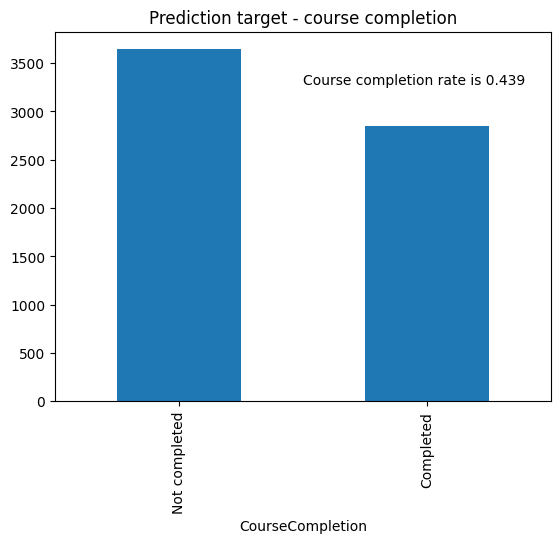

In [7]:
ax = data['CourseCompletion'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Not completed', 'Completed'])
ax.set_title('Prediction target - course completion')
ax.text(x=0.5, y = 0.9 * data[data['CourseCompletion']==0].shape[0], s = f"Course completion rate is {data['CourseCompletion'].mean():.3f}")
plt.show()

Low target class imbalance

<Axes: title={'center': 'Course category percentage'}, xlabel='CourseCategory'>

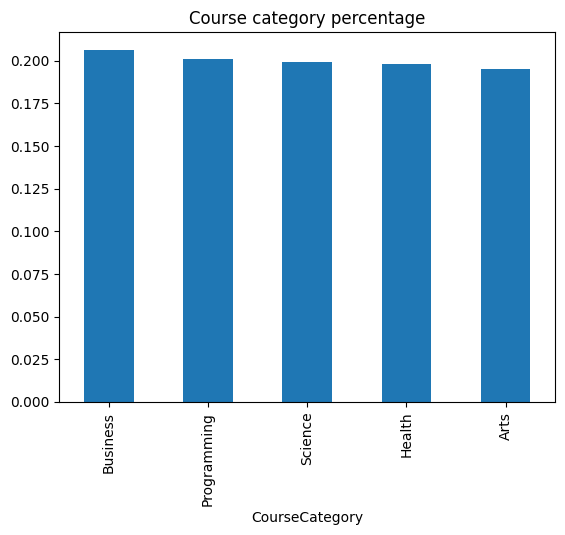

In [8]:
data['CourseCategory'].value_counts(normalize=True).plot(kind='bar', title='Course category percentage')

Relatively equal distribution of course categories

<Axes: title={'center': 'Course category completion rates'}, xlabel='CourseCategory'>

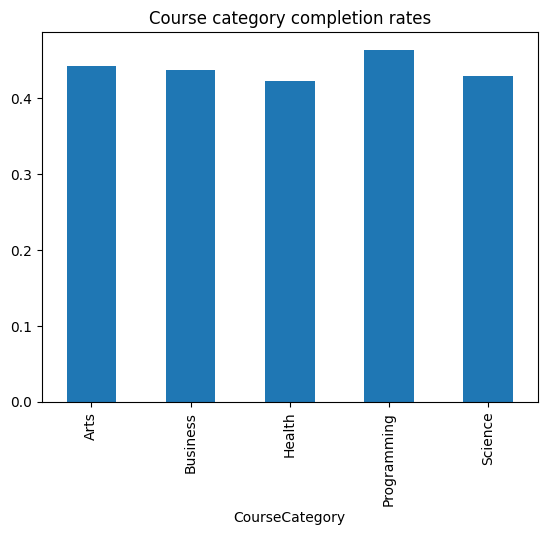

In [9]:
data.groupby('CourseCategory')['CourseCompletion'].mean().plot(kind='bar', title='Course category completion rates')

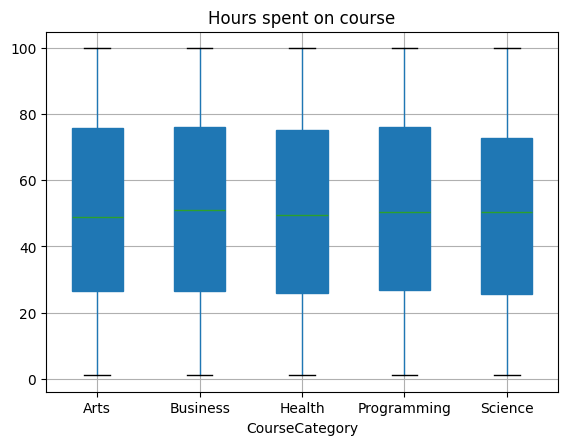

In [10]:
time_spent_on_course_boxplot = data.boxplot(column='TimeSpentOnCourse', by='CourseCategory', 
                                    patch_artist=True)
time_spent_on_course_boxplot.set_title('Hours spent on course')
plt.suptitle('')
plt.show()

Course category possibly irrelevant

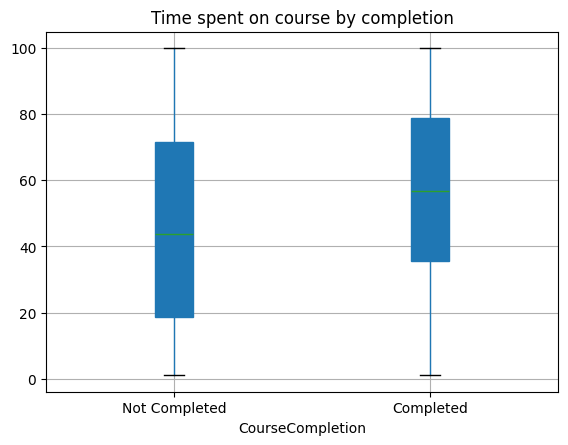

In [11]:
ax = data.boxplot(column='TimeSpentOnCourse', by='CourseCompletion', patch_artist=True)
ax.set_xticklabels(['Not Completed', 'Completed'])
plt.title('Time spent on course by completion')
plt.suptitle('')
plt.show()

Check correlation of numerical variables

In [12]:
numerical_columns = data.columns[2:7]

<Axes: >

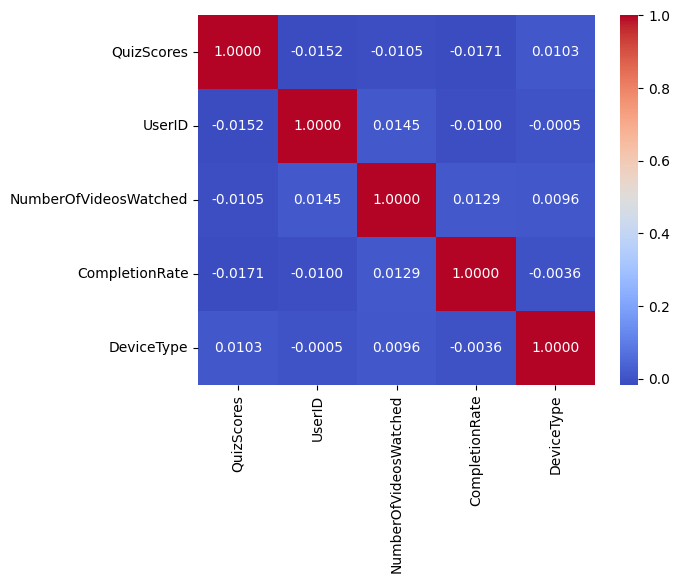

In [13]:
variable_correlation = data.loc[:, numerical_columns].corr()
sns.heatmap(variable_correlation, annot=True, cmap='coolwarm', fmt='.4f')

No correlation among numerical variables

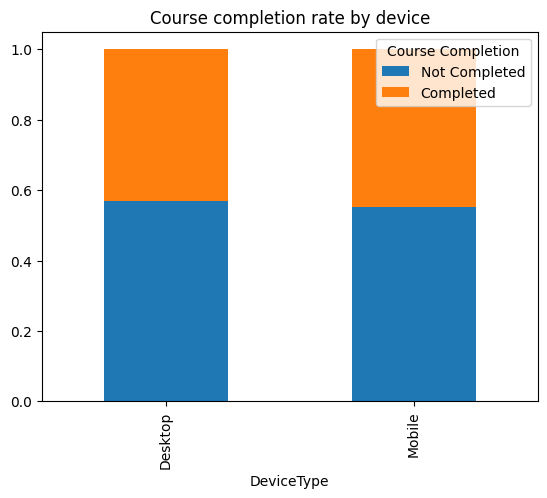

In [14]:
completion_per_device = data.groupby('DeviceType')['CourseCompletion']\
                        .value_counts(normalize=True).unstack()

completion_per_device_ax = completion_per_device.plot(kind='bar', stacked = True)
completion_per_device_ax.set_xticklabels(['Desktop', 'Mobile'])
completion_per_device_ax.set_title('Course completion rate by device')

handles, labels = completion_per_device_ax.get_legend_handles_labels()
completion_per_device_ax.legend(handles, ['Not Completed', 'Completed'], title='Course Completion', loc='upper right', bbox_to_anchor=(1, 1))

Same completion rate per device type

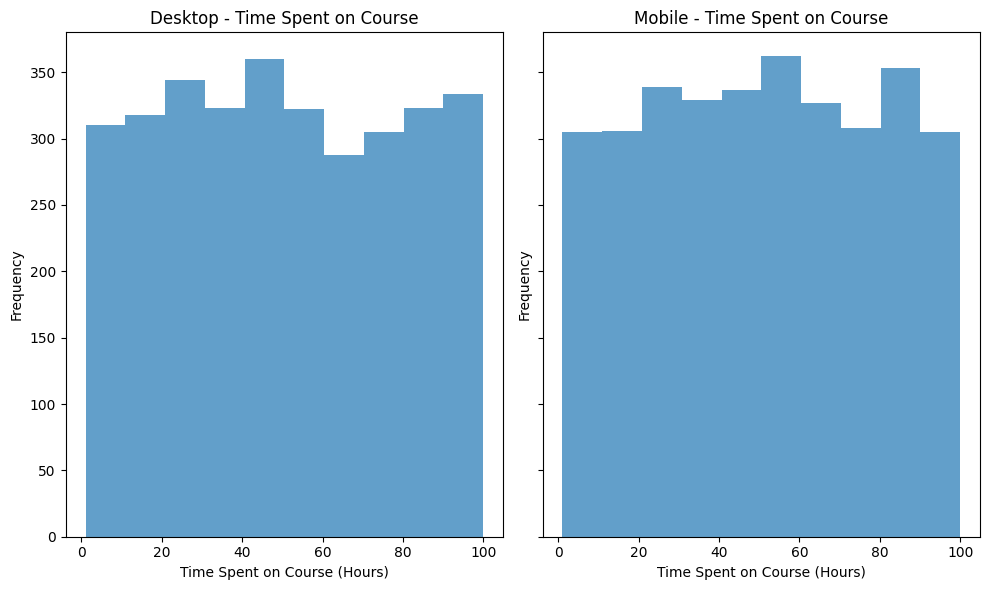

In [15]:
device_mapping = {0: 'Desktop', 1: 'Mobile'}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharex=True, sharey=True)

for ax, device_type in zip(axes, [0, 1]):
    subset = data[data['DeviceType'] == device_type]
    ax.hist(subset['TimeSpentOnCourse'], bins=10, alpha=0.7)
    ax.set_title(f'{device_mapping[device_type]} - Time Spent on Course')
    ax.set_xlabel('Time Spent on Course (Hours)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Time spent on a device (hours)')

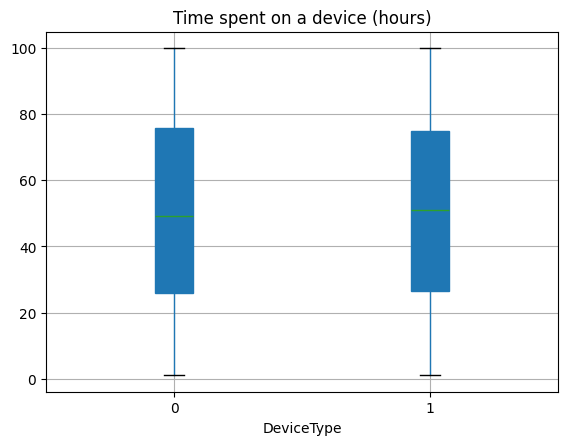

In [16]:
data.boxplot(column = 'TimeSpentOnCourse', by='DeviceType', patch_artist=True)
plt.suptitle('')
plt.title('Time spent on a device (hours)')


In [17]:
data.groupby('DeviceType')['TimeSpentOnCourse'].describe()

,count,mean,std,min,25%,50%,75%,max
DeviceType,,,,,,,,
0,3227.0,50.347843,28.562200,1.005230,25.795415,49.119697,75.856509,99.980709
1,3271.0,50.783901,28.103254,1.015617,26.537738,50.902938,74.882704,99.992558


Very similar distributions of time spent per device type

Device type possibly irrelevant

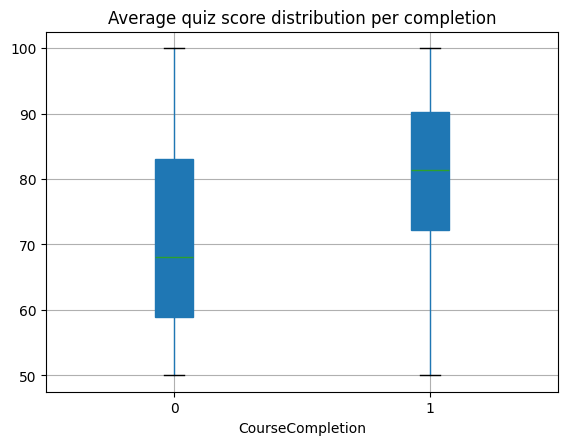

In [18]:
data.boxplot(column='QuizScores', by='CourseCompletion', patch_artist=True)
plt.suptitle('')
plt.title('Average quiz score distribution per completion')
plt.show()

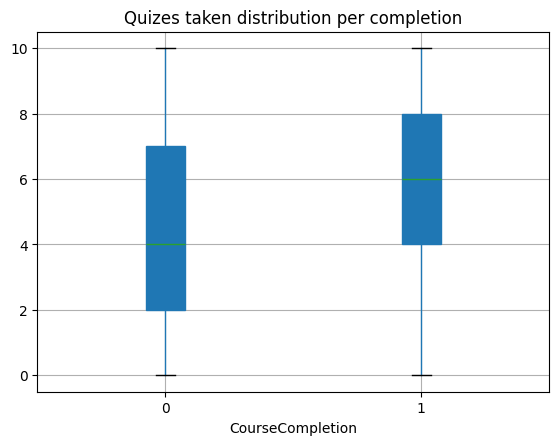

In [19]:
data.boxplot(column='NumberOfQuizzesTaken', by='CourseCompletion', patch_artist=True)
plt.suptitle('')
plt.title('Quizes taken distribution per completion')
plt.show()

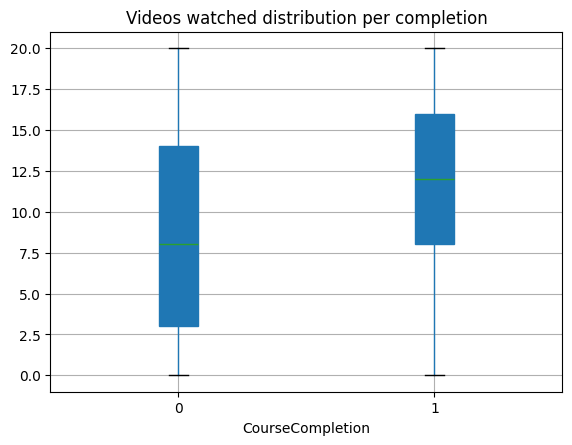

In [20]:
data.boxplot(column='NumberOfVideosWatched', by='CourseCompletion', patch_artist=True)
plt.suptitle('')
plt.title('Videos watched distribution per completion')
plt.show()

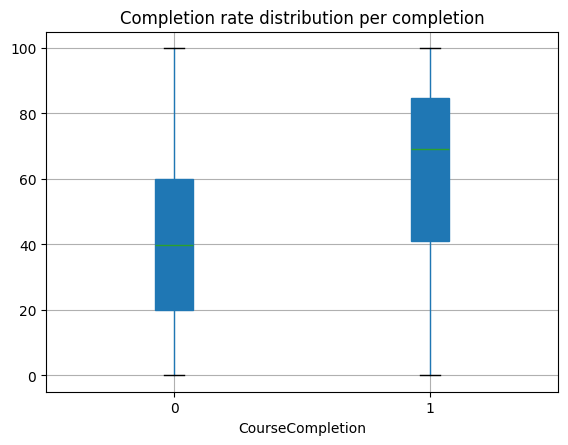

In [21]:
data.boxplot(column='CompletionRate', by='CourseCompletion', patch_artist=True)
plt.suptitle('')
plt.title('Completion rate distribution per completion')
plt.show()

The numeric predictors seem to have the highest impact on course completion probability